In [15]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [40]:
'''
Takes true and predicted values and class names in order and generates a plot
'''
def plotConfMatrix(yTrue, yPredict, clsNames, confusion):
    # Create heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, cmap='jet', fmt='.2f', xticklabels=clsNames, yticklabels=clsNames)
    
    # Add labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return

In [17]:
# fetch dataset 
covertype = fetch_ucirepo(id=31)
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets

classNames = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

In [18]:
# Split model into train and test
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(464809, 54) (116203, 54) (464809, 1) (116203, 1)


In [19]:
# Setup model
mlp = MLPClassifier()
mlp.fit(xTrain, yTrain)

C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

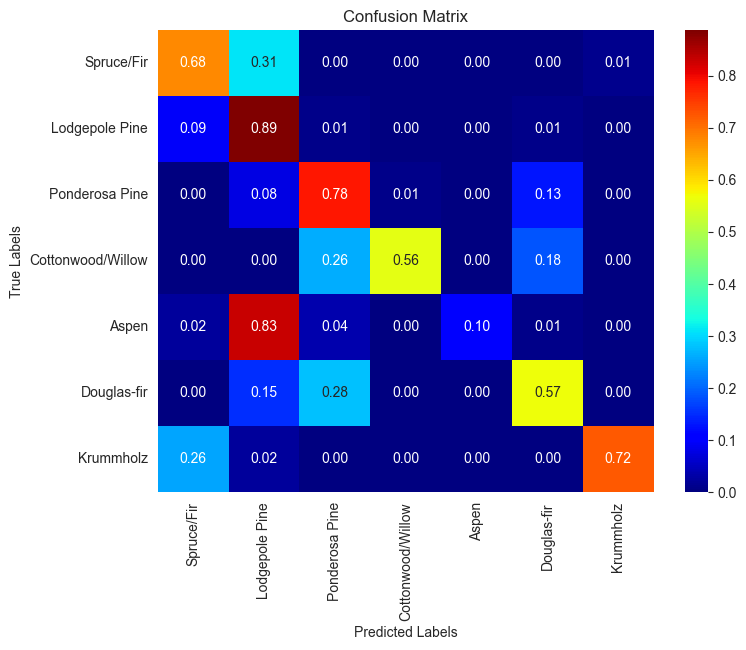

Train Accuracy: 0.7747397318038162%
Test Accuracy: 0.7736719361806493%


In [41]:
# Predict on test data
predictionTrain = mlp.predict(xTrain)
predictionTest = mlp.predict(xTest)

# See metrics
trainAcc = metrics.accuracy_score(yTrain, predictionTrain)
testAcc = metrics.accuracy_score(yTest, predictionTest)
confusion = metrics.confusion_matrix(yTest, predictionTest, normalize='true')
plotConfMatrix(yTest, predictionTest, classNames, confusion)

print(f'Train Accuracy: {trainAcc}%')
print(f'Test Accuracy: {testAcc}%')

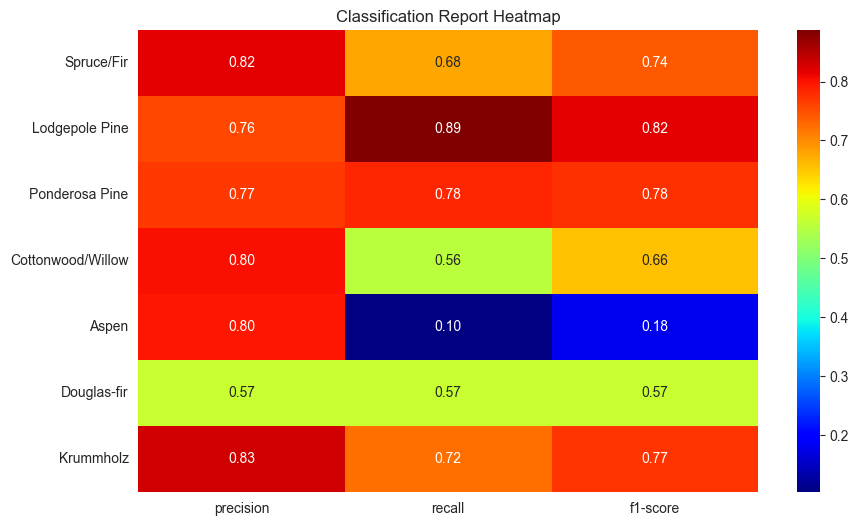

In [36]:
# Generate the classification report as a dictionary
report = metrics.classification_report(yTest, predictionTest, output_dict=True)

reportDF = pd.DataFrame(report).transpose()

reportDF = reportDF.drop(['accuracy', 'macro avg'], errors='ignore')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(reportDF.iloc[:-1, :-1], annot=True, cmap='jet', fmt=".2f", yticklabels=classNames)
plt.title("Classification Report Heatmap")
plt.show()